In [13]:
import pickle
import pandas as pd
import logging
from IPython.display import display
logging_format = '%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=logging_format, datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO)
import shap
shap.initjs()


In [14]:
# from training_functions_1 import *
# path='../outputs/'
# X_test = get_data(name_sav='X_test.sav', path=path)

In [15]:
path = '../outputs/'

file = f'{path}explainer.sav'
explainer = pickle.load(open(file, 'rb'))

file = f'{path}shap_test.sav'
shap_test = pickle.load(open(file, 'rb'))

file = f'{path}x_Test.sav'
x_Test = pickle.load(open(file, 'rb'))

file = f'{path}X_test.sav'
X_test = pickle.load(open(file, 'rb'))

In [16]:
len_features = shap_test.values[0].shape[0]
len_X_test = X_test.shape[0]
sp_values_list = []
for j in range(0, len_X_test):
    ind_sp_values_list = []
    for i in range(0, len_features):
        ind_sp_values_list.append(shap_test.values[j][i][1])
    sp_values_list.append(ind_sp_values_list)
    pd_shape = pd.DataFrame(
        sp_values_list, columns=list(X_test.columns))
    pd_f_i = abs(pd_shape).mean().to_frame()
    pd_f_i.reset_index(drop=False, inplace=True)
    pd_f_i.columns = ['feature_names', 'feature_importances']
    pd_f_i.sort_values(by='feature_importances',
                   ascending=False,
                   inplace=True)

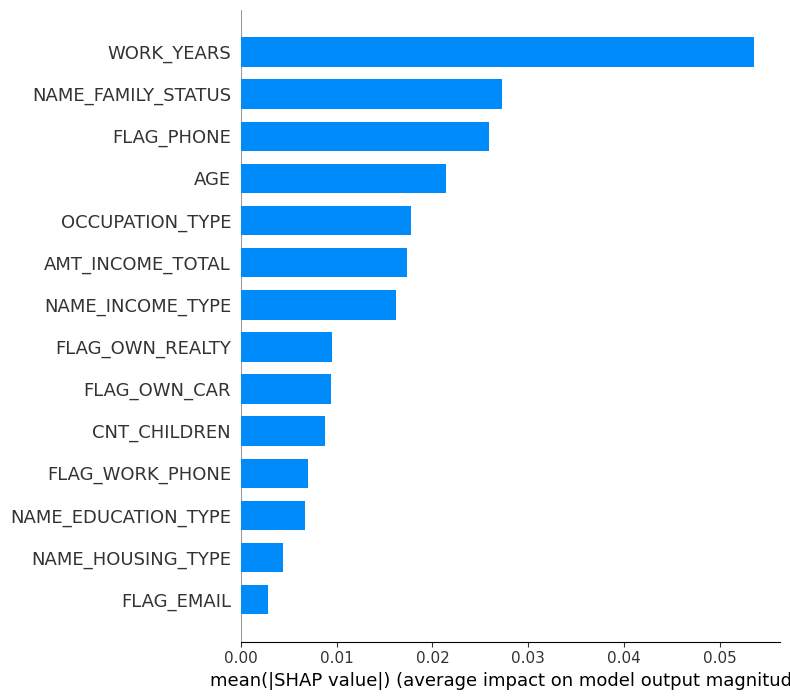

In [17]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns,
                  plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


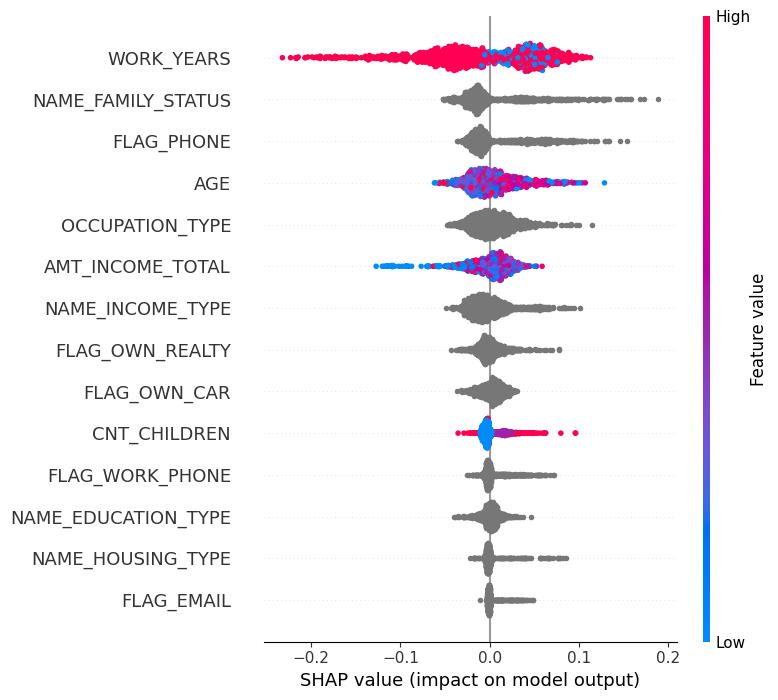

In [18]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns)

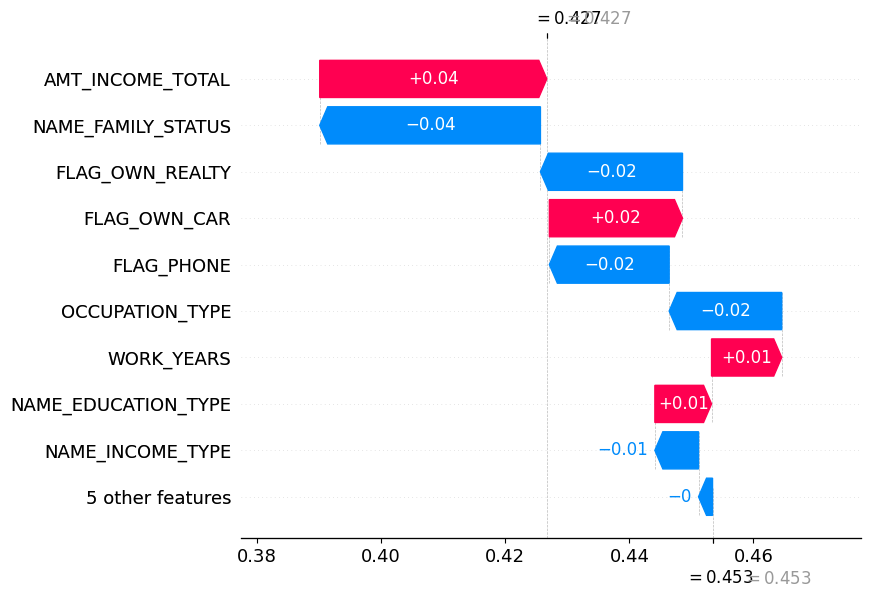

In [24]:
i=10
shap.plots._waterfall.waterfall_legacy(shap_test.base_values[i][1],
                                       pd_shape.values[i],
                                       feature_names=X_test.columns)

In [25]:
pd_shape.values[i]

array([ 0.00466326, -0.00133186,  0.03660512,  0.01130999,  0.02145816,
       -0.02289993, -0.00703828,  0.00913675, -0.03557484, -0.00181567,
       -0.01814372, -0.00240154, -0.01930847, -0.00136963])

In [26]:
clf = pickle.load(open('../outputs/risk_model.sav', 'rb'))

In [27]:
X_test.head(10)

,AGE,CNT_CHILDREN,AMT_INCOME_TOTAL,WORK_YEARS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
2972,34,2,135000.0,4,Y,N,Working,Higher education or Academic degree,Married,House / apartment,Core staff,0,0,0
311,63,0,225000.0,-1000,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Unidentified,0,0,0
2063,52,0,418500.0,0,Y,Y,Working,Higher education or Academic degree,Married,House / apartment,Unidentified,0,1,0
546,47,0,135000.0,10,Y,N,Working,Secondary / secondary special,Married,House / apartment,Drivers,1,1,0
572,64,0,94500.0,-1000,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,Unidentified,0,0,0
2335,38,1,180000.0,10,Y,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Managers,0,0,0
1172,57,0,157500.0,-1000,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,Unidentified,0,1,0
3616,30,0,90000.0,8,Y,Y,Working,Secondary / secondary special,Married,With parents,Unidentified,1,0,0
4793,48,0,202500.0,8,N,N,Commercial associate,Higher education or Academic degree,Married,House / apartment,Accountants,0,0,0
4277,62,0,225000.0,-1000,Y,Y,Pensioner,Higher education or Academic degree,Married,House / apartment,Unidentified,0,0,0


In [29]:
clf.predict_proba(pd.DataFrame(X_test.loc[2972, :]).T)[0][1]

0.399207007042541